In [124]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [126]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

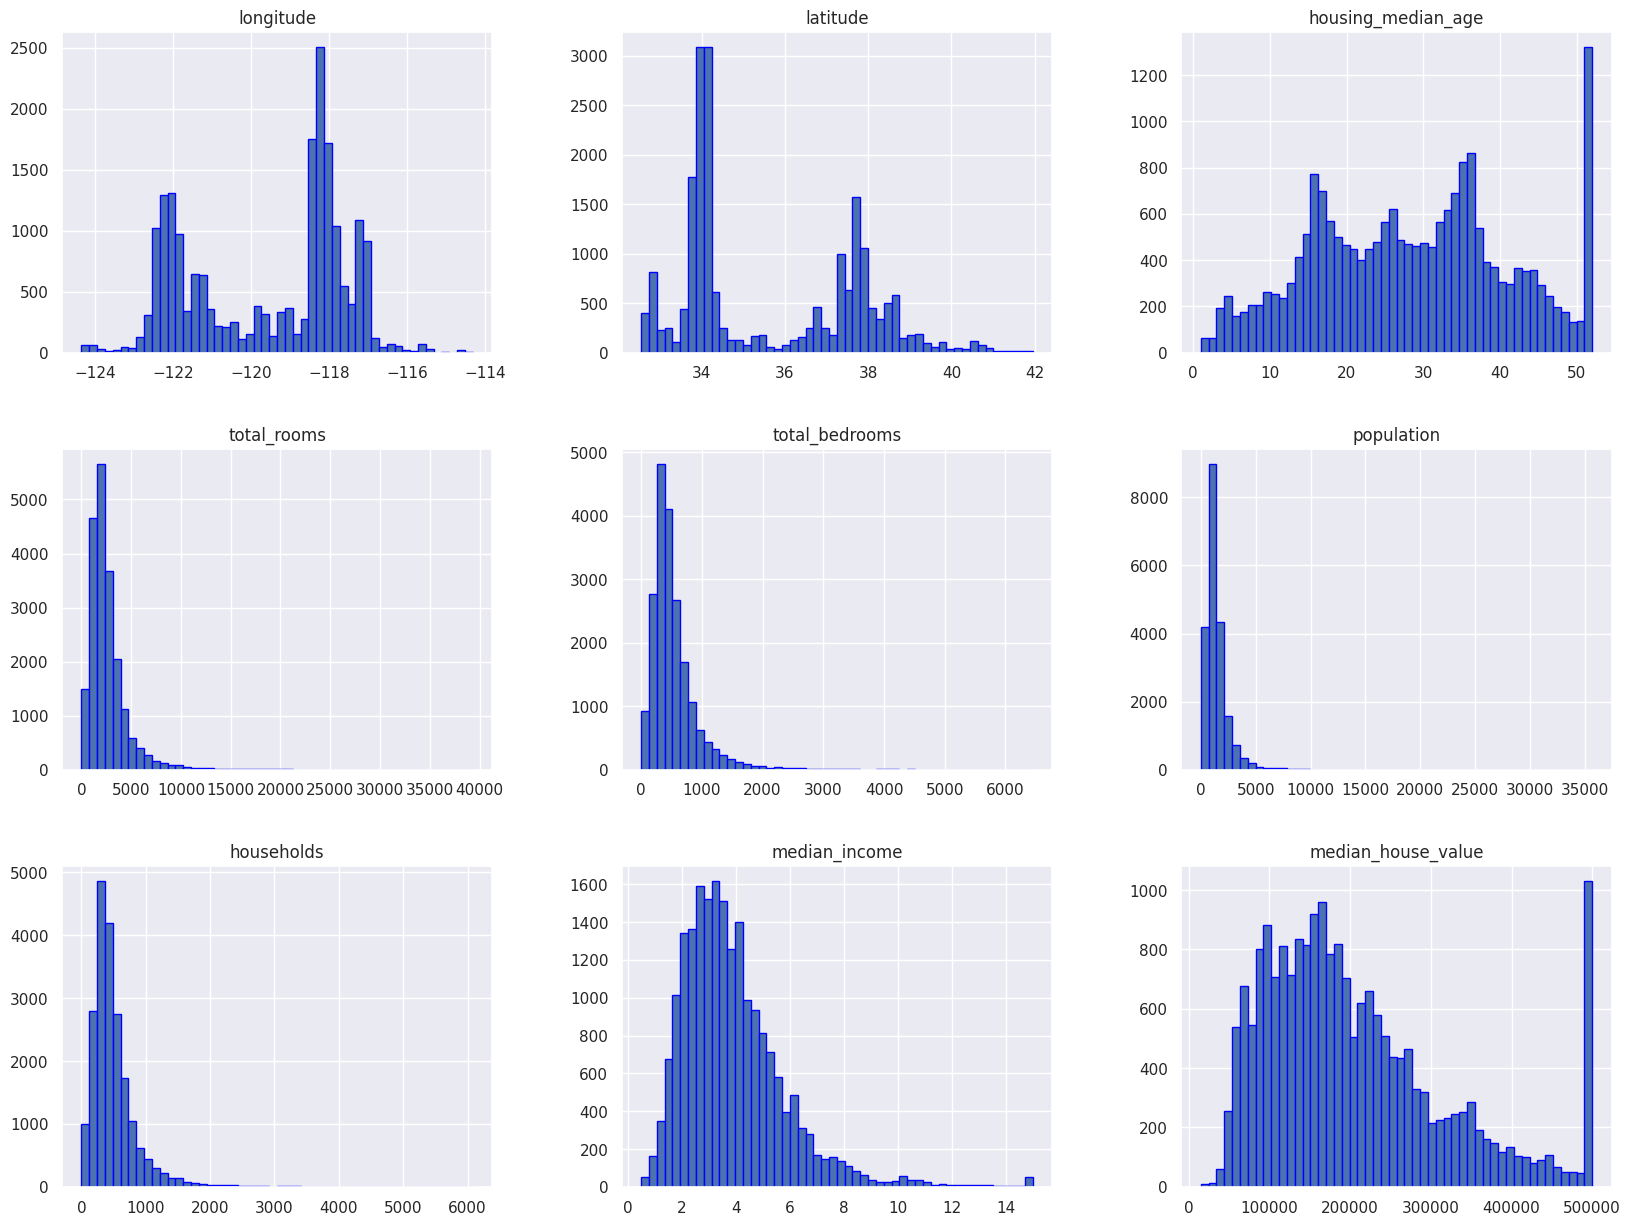

In [127]:
df.hist(bins=50, figsize=(20,15), edgecolor='blue')

In [128]:
datos = df.dropna()

<Axes: xlabel='latitude', ylabel='longitude'>

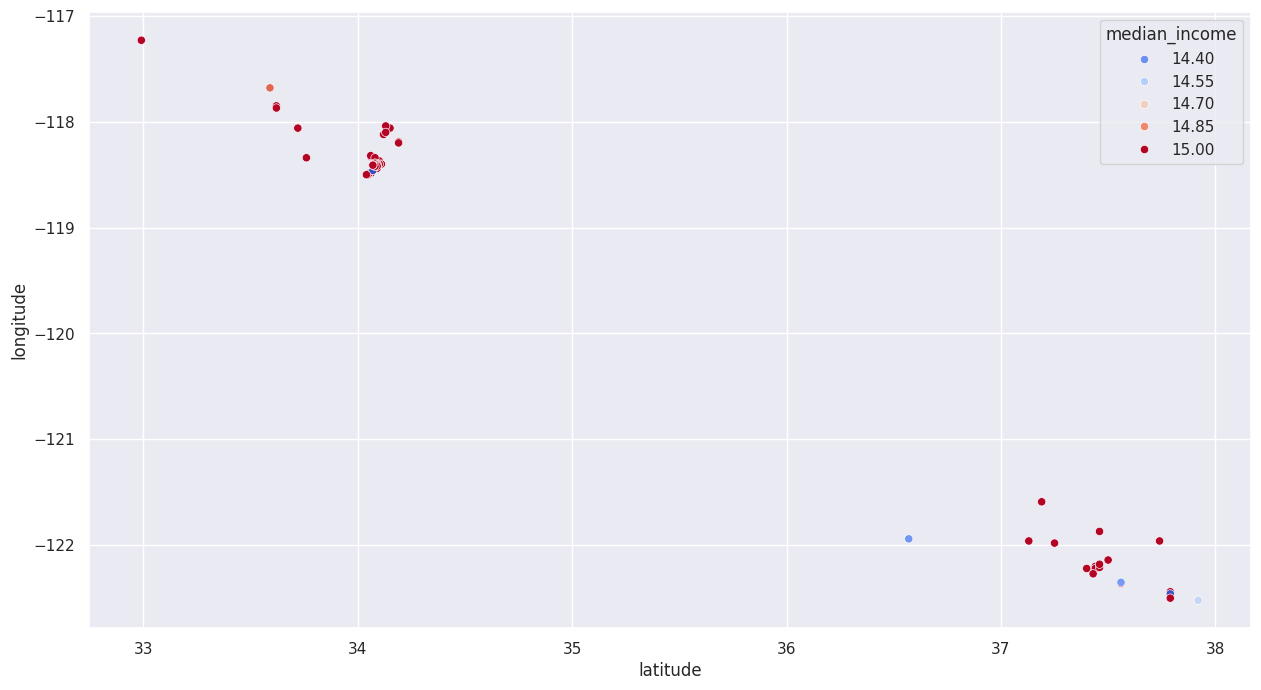

In [129]:
import seaborn as sb

sb.scatterplot(data=datos[datos['median_income'] > 14], x='latitude', y='longitude', hue='median_income', palette='coolwarm')

In [130]:
datos['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [131]:
datos = pd.concat([datos, pd.get_dummies(datos['ocean_proximity'], dtype=int)], axis=1)
datos.drop(['ocean_proximity'], axis=1, inplace=True)

In [132]:
datos = datos[(datos['housing_median_age'] < 50) &
              (datos['median_house_value'] < 500000) &
              (datos['median_income'] < 15)]

<Axes: >

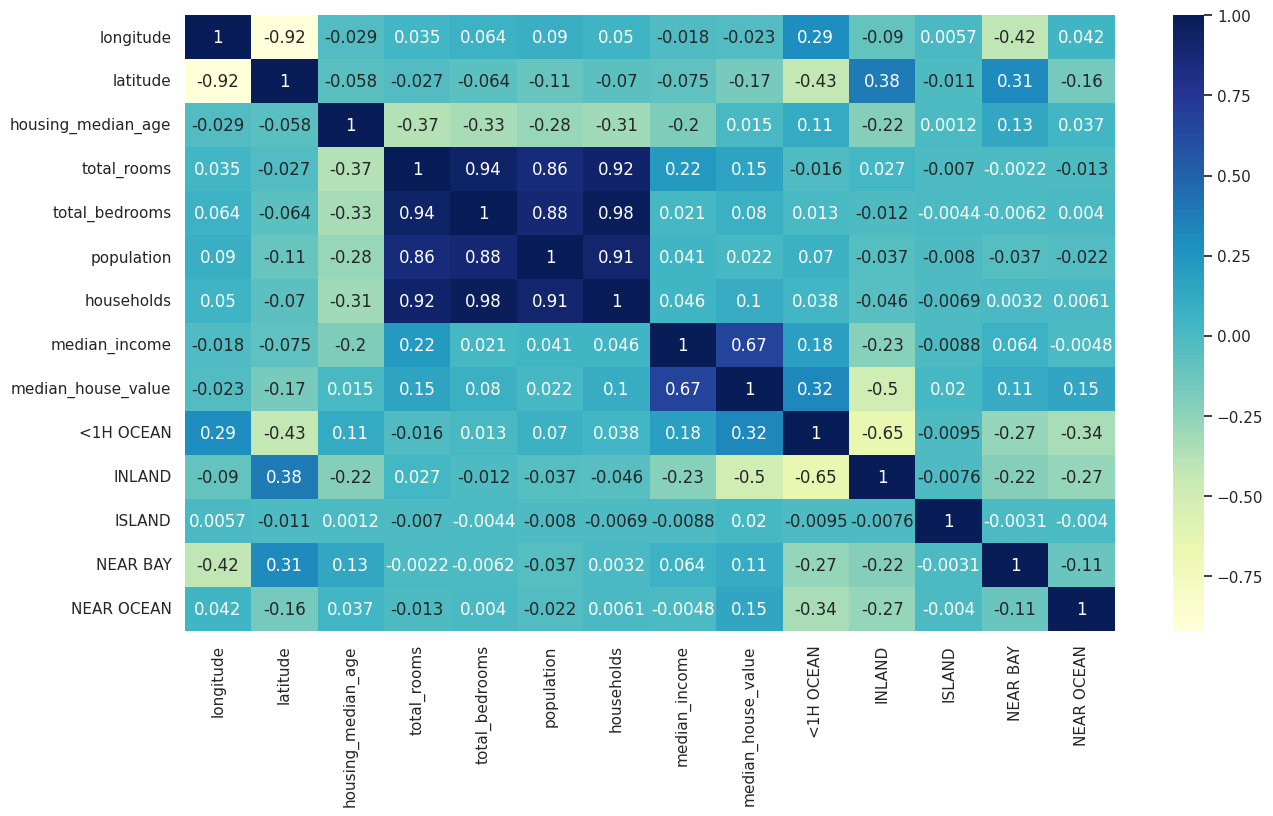

In [133]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu')

In [134]:
import numpy as np

datos['log_income'] = np.log1p(datos['median_income'])
datos['log_house_value'] = np.log1p(datos['median_house_value'])

In [135]:
datos['room_per_household'] = datos['total_rooms'] / datos['households']
datos['bedrooms_per_room'] = datos['total_bedrooms'] / datos['total_rooms']
datos['households_per_population'] = datos['households'] / datos['population']
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,log_income,log_house_value,room_per_household,bedrooms_per_room,households_per_population
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,2.232720,13.022766,6.984127,0.146591,0.391304
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,2.230165,12.789687,6.238137,0.155797,0.473969
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0,1.125059,12.331387,4.294118,0.260274,0.493367
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,0,0,0,1,0,0.857729,11.901590,4.524096,0.245007,0.405868
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0,0,0,1,0,0.998239,11.981685,4.478142,0.223917,0.393972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,0.940124,11.265758,5.045455,0.224625,0.390533
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,1.268861,11.252872,6.114035,0.215208,0.320225
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,0.993252,11.432810,5.205543,0.215173,0.429990
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,1.053336,11.346883,5.329513,0.219892,0.470985


In [136]:
# Características de entrada
X = datos.drop(columns=['median_house_value', 'median_income'], axis=1) # 'axis=1' para eliminar la columna.

# Etiqueta de salida
y = datos['median_house_value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [137]:
# Predicciones con los datos que el modelo nunca ha visto.
predicciones = modelo.predict(X_test)

comparativa = {'Predicciones': predicciones, 'Valor Real':y_test}
resultado = pd.DataFrame(comparativa)
resultado

,Predicciones,Valor Real
7573,126386.592757,118800.0
19370,329573.020413,364800.0
12177,196550.630480,173300.0
775,216108.869614,194400.0
17398,165405.369775,147200.0
...,...,...
13574,112599.568638,97600.0
6178,205807.841430,186900.0
8498,229524.918154,208900.0
6531,213350.850025,199300.0


In [138]:
modelo.score(X_test, y_test)

0.9164830373216993

In [139]:
modelo.score(X_train, y_train)

0.9169411428430719

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.61047053,  1.34484899, -0.95517588, ..., -0.06619445,
        -0.57766607, -0.0660019 ],
       [ 0.60095716, -0.71830967, -0.77722651, ..., -1.24167797,
         4.45201899, -0.71981022],
       [-1.37262819,  0.86515296, -0.77722651, ..., -0.67838286,
         0.69696884,  1.7368617 ],
       ...,
       [ 0.48962671, -0.65310826,  0.73534312, ...,  0.25372821,
        -0.87986972,  0.04902438],
       [ 0.67686429, -0.64845102,  1.09124186, ...,  0.22155536,
        -0.86090816, -0.2356752 ],
       [-1.18033013,  0.7720081 , -0.59927714, ..., -0.33765814,
         0.22981698,  2.7330347 ]])

In [141]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
mse

28276.537772412586

El resultado de los cambios fue significativamente mejor, ya que la precisión del modelo aumentó de aprox. **0.65** a **0.91**. Esto demuestra que los ajustes aplicados tienen un impacto importante en el modelo.

La razón de estos cambios es que cada uno aborda aspectos específicos de los datos que afectan su distribución y la relación entre las variables. Primero, eliminé datos con límites fijos para reducir el ruido causado por valores topeados en algunas variables, como casas con más de 50 años o precios mayores a $500,000. Esto permite que el modelo tenga datos más representativos.

Luego, añadí nuevas características como la relación entre habitaciones y población, o la relación de habitaciones por hogar. Estas características adicionales ayudan a captar mejor las dinámicas en los datos sin introducir relaciones redundantes.

Finalmente, al aplicar la transformación logarítmica en las variables 'median_income' y 'median_house_value', logré reducir la asimetría y acercarlas a una distribución más normal. Esto mejora la linealidad entre las variables, lo cual facilita que el modelo de regresión lineal capture mejor las relaciones entre los datos. Según la teoría, una distribución normal suele resultar en un modelo más preciso, y en mi caso, este cambio fue fundamental para llegar al aprox. 91%.

En resumen, estos ajustes permitieron una mayor precisión al reducir el impacto de valores atípicos, enriquecer las relaciones entre variables y mejorar la distribución de los datos, logrando un avance significativo en el rendimiento del modelo.